# <a href="https://thetahat.ru/courses/ad" target="_top">Введение в анализ данных</a>

## Сбор данных из открытых источников

В этом занятии мы обсудим, что можно сделать, если у вас на руках нет готовых данных, которые нужно анализировать. Один из способов набрать себе данных &mdash; взять из интернета. Человек часто находит информацию в сети и анализирует её, так почему же не заставить компьютер сделать то же самое?

Поиск данных в сайтах называют скрапингом от английского слова *scrape* (наскребать). Программа-скрапер может обходить веб-страницы и собирать нужную себе информацию. Если скачанную информацию требуется обрабатывать впоследствии, то сбор делится на 2 этапа:

* **скрапинг** — скачивание информации,
* **парсинг** — приведение скачанных данных к удобному структурированному виду.

Многие компании пользуются таким сбором информации. Зачастую этот процесс связан с обработкой персональных данных, поэтому в последнее время ведутся разговоры о государственном регулировании скрапинга, о чём, например, написано на <a target="_blank" href="https://habr.com/ru/post/545818/?">Хабре</a>. Если вкратце, то надо быть осторожными при использовании парсинга.

1.   Не стоит перегружать сервера — если они сгорят, это может быть расценено, как ущерб имуществу.
2.   Не нужно взламывать защитные системы — за неправомерный доступ существует ответственность.
3.   Следите за тем, что вы не подписали пользовательское соглашение, в котором запрещён скрапинг.
4.   Учитывайте законы об интеллектуальной собственности.
5.   Не собирайте персональные данные людей без их согласия даже из открытого доступа.



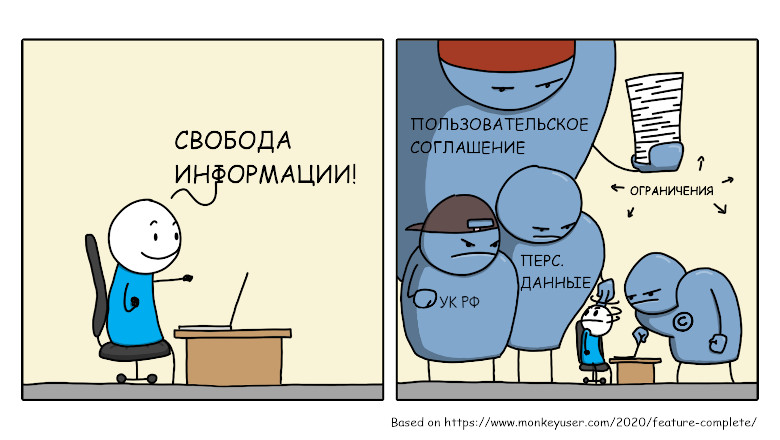

## 1. Сбор с использованием API

Создатели некоторых сервисов понимают, что находящаяся на их сайтах информация может быть полезна для аналитики. Тогда они предоставляют специальный набор ссылок (**урлов**), на которые можно отправлять HTTP-запросы. Тогда вместо получения html-страницы, как в браузере, сайт будет отдавать сразу структурированные данные, например, в формате JSON. Совокупность форматов таких запросов образует API (Application Program Interface).

В таком случае сайт может отдавать только те данные, которыми хочет делиться, следить за количеством обращений к этим данным, а для аналитика такой вариант лучше, поскольку позволяет быстрее парсить результат.

Сегодня же мы разберём, как работать с <a target="_blank" href="https://kinopoisk.dev/">API Кинопоиска</a>. Мы попробуем скачать информацию о фильмах.

In [ ]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, palette="Set2", style="whitegrid")

Чтобы иметь возможность обращаться к API, пользователю требуется авторизация. Для этого необходимо зарегистрироваться на сайте API. В разделе <a target="_blank" href="https://kinopoisk.dev/docs">документация</a>, где описан формат ссылок для получения информации, вы увидите ваш токен. Это специальный ключ-строка, который позволяет системе идентифицировать вас и, например, считать количество ваших запросов, которое тарифицируется.

Ваш токен &mdash; ваша личная информация. Лучше не показывать её другим людям, иначе они смогут задавать запросы от вашего имени. Поэтому предпочтительнее сохранить его в какой-то файл и читать оттуда при необходимости.

In [ ]:
# Считываем токен авторизации
with open('token.txt') as token_file:
    token = token_file.read()

Скачаем информацию про фильм "Джентльмены". Для этого найдём его в поиске на сайте <a target="_blank" href="https://www.kinopoisk.ru/">Кинопоиска</a>. Откроем страницу с фильмом. Она имеет вид `https://www.kinopoisk.ru/film/1143242/`. Здесь `1143242` &mdash; это ID фильма, который требуется для запроса в API.

Путь, на который нужно подать запрос, формируется таким образом:

`ttps://api.kinopoisk.dev/v1.4/movie/{FILM_ID}/token/{TOKEN}`.

Подробные указания можно посмотреть в документации.

Чтобы отправить запрос, будем использовать библиотеку `requests`. Так как мы получаем информацию, требуется функция `get`. Она принимает ссылку, а также дополнительные параметры, после чего отправляет запрос.

In [ ]:
import requests

film_id = "1143242"

url = f"https://api.kinopoisk.dev/v1.4/movie/{film_id}"
headers = {
    "X-API-KEY": token
}

response = requests.get(url, headers=headers)
print(response)
film_info = response.json()
print(film_info)

<Response [200]>
{'id': 1143242, 'externalId': {'kpHD': '47649cf90de74aca8da7eb5b17fc8a8a', 'imdb': 'tt8367814', 'tmdb': 522627}, 'name': 'Джентльмены', 'alternativeName': 'The Gentlemen', 'enName': None, 'names': [{'name': 'Toff Guys', 'language': 'GB', 'type': 'working title'}, {'name': 'Los Caballeros de la mafia', 'language': 'ES', 'type': None}, {'name': 'Busha', 'language': 'GB', 'type': 'working title'}, {'name': 'Los caballeros: criminales con clase', 'language': 'AR', 'type': None}, {'name': '紳士追殺令', 'language': 'TW', 'type': None}, {'name': 'Джентльмени', 'language': 'UA', 'type': None}, {'name': 'Εγκληματίες πρώτης τάξεως', 'language': 'GR', 'type': None}, {'name': 'ジェントルメン：2020', 'language': 'JP', 'type': None}, {'name': 'The Gentlemen', 'language': 'US', 'type': None}, {'name': 'Beyefendiler', 'language': 'TR', 'type': None}], 'type': 'movie', 'typeNumber': 1, 'year': 2019, 'description': 'Один ушлый американец ещё со\xa0студенческих лет\xa0приторговывал наркотиками, а\xa0

Результат запроса также содержит в себе код ответа, который отправил сервер. В случае успеха возвращается код `200`. Другие распространённые коды, которые сообщают об ошибках:

* `404` &mdash; путь не найден,
* `403` &mdash; нет доступа,
* `400` &mdash; неверный формат запроса.

Выведем информацию о фильме. Видим, что доступны id фильма, актёрский состав, возрастное ограничение, год выпуска и другая информация.

In [ ]:
film_info

{'id': 1143242,
 'externalId': {'kpHD': '47649cf90de74aca8da7eb5b17fc8a8a',
  'imdb': 'tt8367814',
  'tmdb': 522627},
 'name': 'Джентльмены',
 'alternativeName': 'The Gentlemen',
 'enName': None,
 'names': [{'name': 'Toff Guys', 'language': 'GB', 'type': 'working title'},
  {'name': 'Los Caballeros de la mafia', 'language': 'ES', 'type': None},
  {'name': 'Busha', 'language': 'GB', 'type': 'working title'},
  {'name': 'Los caballeros: criminales con clase',
   'language': 'AR',
   'type': None},
  {'name': '紳士追殺令', 'language': 'TW', 'type': None},
  {'name': 'Джентльмени', 'language': 'UA', 'type': None},
  {'name': 'Εγκληματίες πρώτης τάξεως', 'language': 'GR', 'type': None},
  {'name': 'ジェントルメン：2020', 'language': 'JP', 'type': None},
  {'name': 'The Gentlemen', 'language': 'US', 'type': None},
  {'name': 'Beyefendiler', 'language': 'TR', 'type': None}],
 'type': 'movie',
 'typeNumber': 1,
 'year': 2019,
 'description': 'Один ушлый американец ещё со\xa0студенческих лет\xa0приторговыва

Давайте теперь соберём информацию о наборе фильмов в `pandas.DataFrame`. Количество фильмов, которое можно скачать за день, ограничено на бесплатном тарифе 50 запросами, поэтому скачаем сколько получится. Скачивание набора фильмов производится постранично. Одна страница содержит 10 фильмов, её можно скачать одним запросом. Его формат, а также формат ответа, описан в документации.

In [ ]:
# Базовый URL API
url = "https://api.kinopoisk.dev/v1.4/movie?page={page_num}"

# Заголовки с токеном
headers = {
    "X-API-KEY": token
}

# Функция для скачивания данных о фильмах по страницам
def download_movies(page_num):
    response = requests.get(url.format(page_num=page_num), headers=headers)
    if response.status_code == 200:
        return response.json()  # Возвращаем JSON с данными
    else:
        print(f"Ошибка: {response.status_code}")
        return {}

all_movies = []
for page in range(1, 21):
    movies_data = download_movies(page)
    if movies_data:
        print(f"Ответ на странице {page}:")
        print(json.dumps(movies_data, indent=4))
        # Проверим, что в ответе есть ключ с фильмами
        if 'docs' in movies_data:
            all_movies.extend(movies_data['docs'])  # Фильмы находятся в 'docs'
        else:
            print(f"Ошибка: Нет ключа 'docs' на странице {page}")

df_movies = pd.DataFrame(all_movies)
df_movies.to_csv("films_info.csv", index=False)
print("Данные успешно собраны и сохранены в файл.")
print(df_movies.head())


Ответ на странице 1:
{
    "docs": [
        {
            "id": 6532244,
            "name": "\u041a\u0440\u0443\u0442\u043e\u0439 \u043a\u043e\u043d\u0446\u0435\u0440\u0442",
            "alternativeName": null,
            "enName": null,
            "type": "movie",
            "typeNumber": 1,
            "year": 2024,
            "description": null,
            "shortDescription": null,
            "status": null,
            "rating": {
                "kp": 0,
                "imdb": 0,
                "filmCritics": 0,
                "russianFilmCritics": 0,
                "await": 0
            },
            "votes": {
                "kp": 4,
                "imdb": 0,
                "filmCritics": 0,
                "russianFilmCritics": 0,
                "await": 0
            },
            "movieLength": 74,
            "totalSeriesLength": null,
            "seriesLength": null,
            "ratingMpaa": null,
            "ageRating": null,
            "genres": [

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 200 non-null    int64  
 1   name               75 non-null     object 
 2   alternativeName    152 non-null    object 
 3   enName             0 non-null      float64
 4   type               200 non-null    object 
 5   typeNumber         200 non-null    int64  
 6   year               177 non-null    float64
 7   description        41 non-null     object 
 8   shortDescription   3 non-null      object 
 9   status             63 non-null     object 
 10  rating             200 non-null    object 
 11  votes              200 non-null    object 
 12  movieLength        104 non-null    float64
 13  totalSeriesLength  4 non-null      float64
 14  seriesLength       21 non-null     float64
 15  ratingMpaa         3 non-null      object 
 16  ageRating          35 non-

У нас есть две колонки с названием фильма, возьмем первую ненулевую для каждого, и сделаем одну колонку с названием фильма

In [ ]:
df_movies_alt = df_movies.copy()
df_movies_alt['name_final'] = df_movies['name'].combine_first(df_movies['alternativeName'])
df_movies_alt = df_movies_alt.drop(columns=['name', 'alternativeName'])
df_movies_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 200 non-null    int64  
 1   enName             0 non-null      float64
 2   type               200 non-null    object 
 3   typeNumber         200 non-null    int64  
 4   year               177 non-null    float64
 5   description        41 non-null     object 
 6   shortDescription   3 non-null      object 
 7   status             63 non-null     object 
 8   rating             200 non-null    object 
 9   votes              200 non-null    object 
 10  movieLength        104 non-null    float64
 11  totalSeriesLength  4 non-null      float64
 12  seriesLength       21 non-null     float64
 13  ratingMpaa         3 non-null      object 
 14  ageRating          35 non-null     float64
 15  genres             197 non-null    object 
 16  countries          196 non

Видим много пропущенных значений, оставим только те колонки, в которых есть какая-то полезная информация

In [ ]:
threshold = 150 # колонки, в которых меньше 150 ненулевых значений уберем
df_movies_alt = df_movies_alt.loc[:, df_movies_alt.notnull().sum() >= threshold]

df_movies_alt = df_movies_alt.drop(columns=['votes', 'typeNumber', 'isSeries', 'ticketsOnSale'])

df_movies_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          200 non-null    int64  
 1   type        200 non-null    object 
 2   year        177 non-null    float64
 3   rating      200 non-null    object 
 4   genres      197 non-null    object 
 5   countries   196 non-null    object 
 6   name_final  200 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.1+ KB


Сделаем колонку отечественных фильмов. В колонке стран есть список стран, которые участвовали в создании фильма.

In [ ]:
df_movies_alt['is_russian'] = df_movies_alt['countries'].apply(
    lambda x: any(country.get('name') == 'Россия' for country in x) if isinstance(x, list) else False
)
df_movies_alt

id             type    year  \
0    6532244            movie  2024.0   
1    7874438        tv-series  1992.0   
2    7875986  animated-series  1988.0   
3    7874440        tv-series  2013.0   
4    7873532  animated-series  2024.0   
..       ...              ...     ...   
195  7784354        tv-series  2024.0   
196  7784347        tv-series  2024.0   
197  7783381        tv-series  2024.0   
198  7780976            movie  2022.0   
199  7781332            movie  2023.0   

                                                rating  \
0    {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
1    {'kp': 0, 'imdb': 7.5, 'filmCritics': 0, 'russ...   
2    {'kp': 0, 'imdb': 6.9, 'filmCritics': 0, 'russ...   
3    {'kp': 0, 'imdb': 8, 'filmCritics': 0, 'russia...   
4    {'kp': 0, 'imdb': 6.1, 'filmCritics': 0, 'russ...   
..                                                 ...   
195  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
196  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
197  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
198  {'kp': 0, 'imdb': 2.4, 'filmCritics': 0, 'russ...   
199  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   

                                                genres  \
0            [{'name': 'концерт'}, {'name': 'музыка'}]   
1    [{'name': 'документальный'}, {'name': 'комедия'}]   
2       [{'name': 'мультфильм'}, {'name': 'семейный'}]   
3                                 [{'name': 'боевик'}]   
4    [{'name': 'мультфильм'}, {'name': 'фэнтези'}, ...   
..                                                 ...   
195                            [{'name': 'мелодрама'}]   
196                            [{'name': 'мелодрама'}]   
197  [{'name': 'мелодрама'}, {'name': 'детектив'}, ...   
198                              [{'name': 'триллер'}]   
199                      [{'name': 'короткометражка'}]   

                                             countries  \
0                                 [{'name': 'Россия'}]   
1                                    [{'name': 'США'}]   
2    [{'name': 'США'}, {'name': 'Великобритания'}, ...   
3                                    [{'name': 'США'}]   
4                                 [{'name': 'Япония'}]   
..                                                 ...   
195                               [{'name': 'Россия'}]   
196                               [{'name': 'Россия'}]   
197                               [{'name': 'Россия'}]   
198                                  [{'name': 'США'}]   
199                             [{'name': 'Иордания'}]   

                        name_final  is_russian  
0                   Крутой концерт        True  
1                Stand-Up Stand-Up       False  
2                    Fantastic Max       False  
3        Seriously Amazing Objects       False  
4    Kono Sekai wa Fukanzen Sugiru       False  
..                             ...         ...  
195          Верить нельзя солгать        True  
196      Пока брак не разлучит нас        True  
197                 Ты мой, я твоя        True  
198                      Captivity       False  
199                          Farah       False  

[200 rows x 8 columns]

В колонке рейтинга у нас фиксированная структура json-подобного объекта, можно легко перевести его значения в новые колонки:

In [ ]:
df_movies_alt[['rating_kp', 'rating_imdb', 'rating_filmCritics', 'rating_russianFilmCritics', 'rating_await']] = df_movies_alt['rating'].apply(pd.Series)
df_movies_alt

id             type    year  \
0    6532244            movie  2024.0   
1    7874438        tv-series  1992.0   
2    7875986  animated-series  1988.0   
3    7874440        tv-series  2013.0   
4    7873532  animated-series  2024.0   
..       ...              ...     ...   
195  7784354        tv-series  2024.0   
196  7784347        tv-series  2024.0   
197  7783381        tv-series  2024.0   
198  7780976            movie  2022.0   
199  7781332            movie  2023.0   

                                                rating  \
0    {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
1    {'kp': 0, 'imdb': 7.5, 'filmCritics': 0, 'russ...   
2    {'kp': 0, 'imdb': 6.9, 'filmCritics': 0, 'russ...   
3    {'kp': 0, 'imdb': 8, 'filmCritics': 0, 'russia...   
4    {'kp': 0, 'imdb': 6.1, 'filmCritics': 0, 'russ...   
..                                                 ...   
195  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
196  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
197  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   
198  {'kp': 0, 'imdb': 2.4, 'filmCritics': 0, 'russ...   
199  {'kp': 0, 'imdb': 0, 'filmCritics': 0, 'russia...   

                                                genres  \
0            [{'name': 'концерт'}, {'name': 'музыка'}]   
1    [{'name': 'документальный'}, {'name': 'комедия'}]   
2       [{'name': 'мультфильм'}, {'name': 'семейный'}]   
3                                 [{'name': 'боевик'}]   
4    [{'name': 'мультфильм'}, {'name': 'фэнтези'}, ...   
..                                                 ...   
195                            [{'name': 'мелодрама'}]   
196                            [{'name': 'мелодрама'}]   
197  [{'name': 'мелодрама'}, {'name': 'детектив'}, ...   
198                              [{'name': 'триллер'}]   
199                      [{'name': 'короткометражка'}]   

                                             countries  \
0                                 [{'name': 'Россия'}]   
1                                    [{'name': 'США'}]   
2    [{'name': 'США'}, {'name': 'Великобритания'}, ...   
3                                    [{'name': 'США'}]   
4                                 [{'name': 'Япония'}]   
..                                                 ...   
195                               [{'name': 'Россия'}]   
196                               [{'name': 'Россия'}]   
197                               [{'name': 'Россия'}]   
198                                  [{'name': 'США'}]   
199                             [{'name': 'Иордания'}]   

                        name_final  is_russian  rating_kp  rating_imdb  \
0                   Крутой концерт        True        0.0          0.0   
1                Stand-Up Stand-Up       False        0.0          7.5   
2                    Fantastic Max       False        0.0          6.9   
3        Seriously Amazing Objects       False        0.0          8.0   
4    Kono Sekai wa Fukanzen Sugiru       False        0.0          6.1   
..                             ...         ...        ...          ...   
195          Верить нельзя солгать        True        0.0          0.0   
196      Пока брак не разлучит нас        True        0.0          0.0   
197                 Ты мой, я твоя        True        0.0          0.0   
198                      Captivity       False        0.0          2.4   
199                          Farah       False        0.0          0.0   

     rating_filmCritics  rating_russianFilmCritics  rating_await  
0                   0.0                        0.0           0.0  
1                   0.0                        0.0           0.0  
2                   0.0                        0.0           0.0  
3                   0.0                        0.0           0.0  
4                   0.0                        0.0           0.0  
..                  ...                        ...           ...  
195                 0.0                        0.0           0.0  
1

Попробуем посмотреть на тип объекта в полученном датасете:

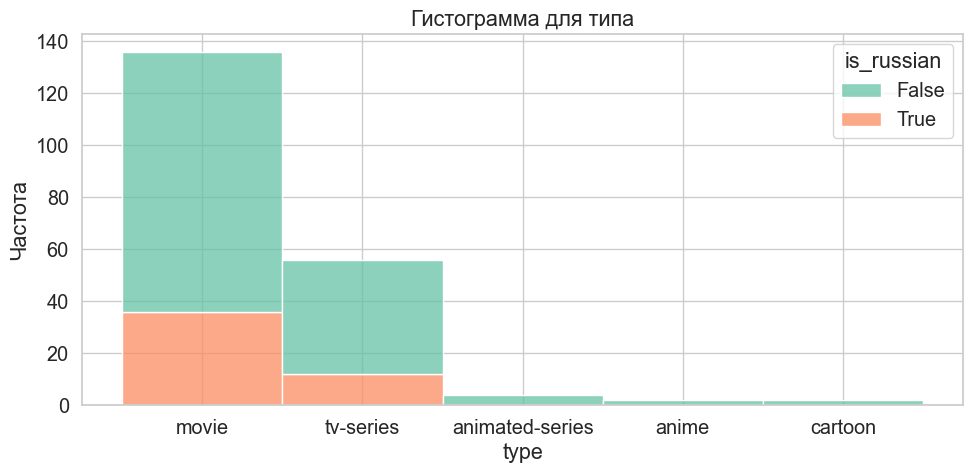

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(
    data=df_movies_alt,
    x='type',
    hue='is_russian',
    bins=15,
    kde=False,
    palette='Set2',
    multiple='stack',
)
plt.title('Гистограмма для типа')
plt.xlabel('type')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


Мы получили рабочий датасет, использовав API кинопоиска. Теперь можем начать использовать это знание 😊

## 2. Парсинг HTML напрямую

Не всегда бывает так, что информация предоставляется в удобном виде. Тогда приходится парсить сырую HTML-страницу. Но в `Python` есть различные библиотеки, которые помогают упростить процесс парсинга, одна из них &mdash; <a target="_blank" href="https://beautiful-soup-4.readthedocs.io/en/latest/">`BeautifulSoup`</a>. Попробуем с её помощью начать обход страниц сайта <a target="_blank" href="simple.wikipedia.org">simple.wikipedia.org</a>.

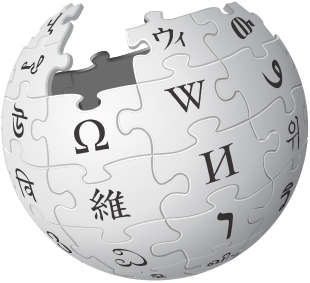

Базовый функционал библиотеки `BeautifulSoup` позволяет нам:

* cоздавать парсер HTML-страницы (принимает строку с документом),
* искать текст на странице (`parser.get_text`),
* искать элементы по тегу (`parser.find`, `parser.findAll`),
* извлекать параметры из элемента (`element.get`).

In [ ]:
!python3 -mpip install url_normalize
!python3 -mpip install bs4

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from url_normalize import url_normalize
from bs4 import BeautifulSoup
from queue import Queue
import time

Определим вспомогательные функции, которые будут скачивать страницу с интернета и искать в ней информацию.

In [ ]:
SEED = "https://simple.wikipedia.org/wiki/Data_science"

def download_from_the_internet(url):
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None


def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')] # параметр а это метка ссылок, берет параметр href- на что ссылается, урлджойн дойн итоговую ссылку


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на странице

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()

    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)

    # Находим название на странице
    title = soup.find('title').string

    return {'text': text, 'title': title}


def is_wiki_article(url):
    '''Проверяет, является ли ссылка страницей на simple.wikipedia'''
    if 'simple.wikipedia' not in url:
        return False

    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']

    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False

    return True

Объявляем список страниц Википедии.

In [ ]:
wiki_df_json = []

Далее напишем обход в ширину графа, построенного на страницах Википедии. Ребро в этом графе означает, что одна страница ссылается на другую. Тогда для того, чтобы получить список соседей страницы, нужно вызвать функцию `extract_links_from_html` и отфильтровать оттуда статьи Википедии. Однако перед тем, как работать со ссылкой, нам нужно привести её к стандартному виду &mdash; нормализовать.

In [ ]:
# Максимальное число загруженных страниц
MAX_DOWNLOADS = 10
# Создаём очередь для обхода в ширину
q = Queue()
q.put(SEED)

already_visited = set()
n_downloads = 0
time_start = time.time()

while not q.empty():
    # Нормализуем урл
    main_url = url_normalize(q.get())
    if main_url in already_visited:
        continue
    already_visited.add(main_url)
    html = download_from_the_internet(main_url)

    # Извлекаем ссылки из страницы
    children_links = extract_links_from_html(main_url, html)
    time.sleep(0.5)

    # Извлекаем текст страницы
    text_info = extract_text_info_from_html(html)

    # Добавляем запись в таблицу
    text_info['url'] = main_url
    wiki_df_json.append(text_info)

    n_downloads += 1
    if n_downloads > MAX_DOWNLOADS:
        break

    # Добавляем ещё не посещённые ссылки в очередь
    for child in children_links:
        if url_normalize(child) not in already_visited and is_wiki_article(child):
            q.put(child)

/var/folders/5f/k6d6ykwj7hgf8mb4_zqgxgl40000gq/T/ipykernel_68281/3903588911.py:32: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


Создадим из данных `DataFrame` и выберем оттуда 5 случайных записей.

In [ ]:
wiki_df = pd.DataFrame(wiki_df_json)

In [ ]:
wiki_df.sample(5)

text  \
9   Data - Simple English Wikipedia, the free ency...   
7   English language - Simple English Wikipedia, t...   
11  Mathematics - Simple English Wikipedia, the fr...   
0   Data science - Simple English Wikipedia, the f...   
3   English language - Simple English Wikipedia, t...   

                                                title  \
9   Data - Simple English Wikipedia, the free ency...   
7   English language - Simple English Wikipedia, t...   
11  Mathematics - Simple English Wikipedia, the fr...   
0   Data science - Simple English Wikipedia, the f...   
3   English language - Simple English Wikipedia, t...   

                                                  url  
9              https://simple.wikipedia.org/wiki/Data  
7   https://simple.wikipedia.org/wiki/English_lang...  
11      https://simple.wikipedia.org/wiki/Mathematics  
0      https://simple.wikipedia.org/wiki/Data_science  
3   https://simple.wikipedia.org/wiki/English_lang...

В данном случае, кроме ссылки, названия и самого текста, про страницу ничего не известно. Для работы с такими данными можно применять продвинутые методы анализа текстов, про которые рассказывается в последующих курсах.